In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 


In [137]:
df = pd.read_csv("/content/drive/MyDrive/Data Set/Life Expectancy Data.csv")

In [138]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [139]:
df.shape

(2938, 22)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [141]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [142]:
new_cols = []
for col in df.columns:
  new_cols.append(col.strip())

In [143]:
new_cols

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [144]:
df.columns = ['Country','Year', 'Status','Life expectancy','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B',
              'Measles','BMI','under-five deaths','Polio','Total expenditure','Diphtheria','HIV/AIDS','GDP','Population','thinness  1-19 years',
              'thinness 5-9 years','Income composition of resources','Schooling']

In [145]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [146]:
num_cols = ['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling']

cat_cols = ['Country', 'Status']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

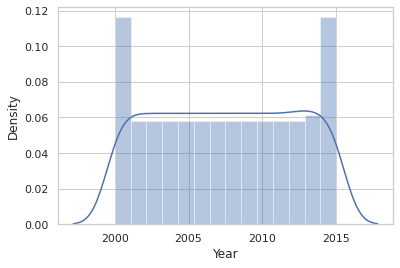

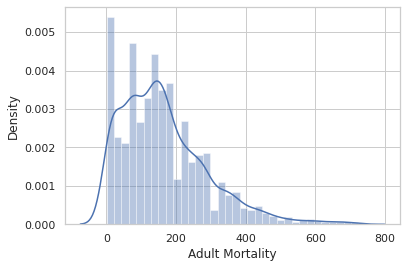

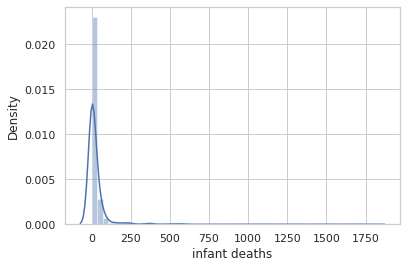

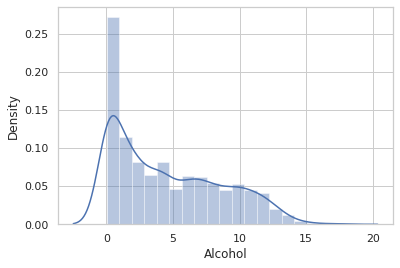

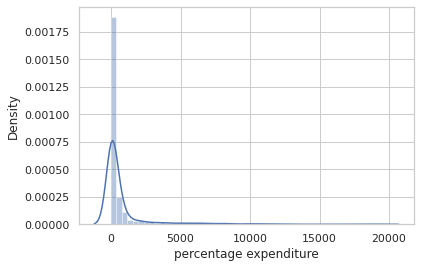

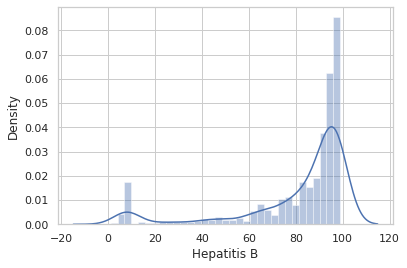

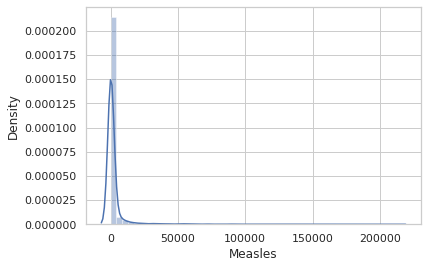

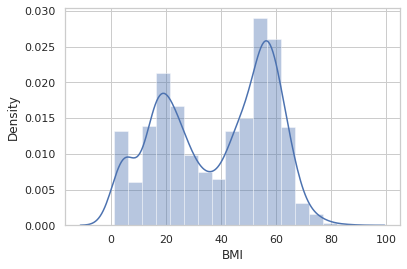

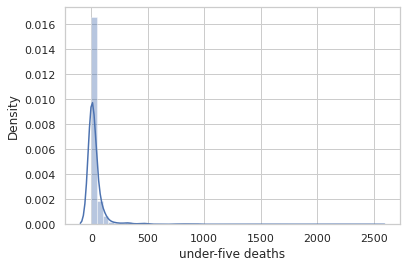

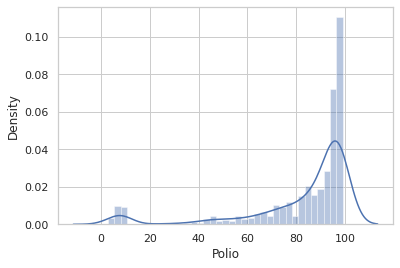

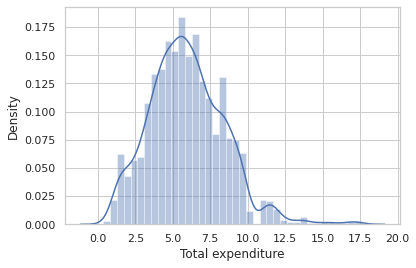

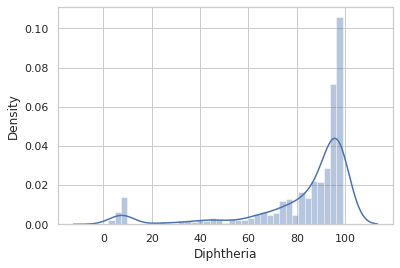

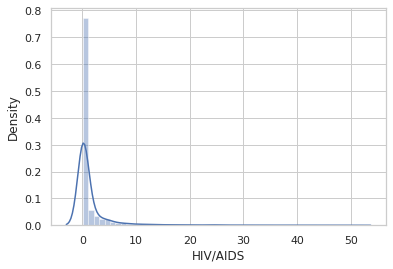

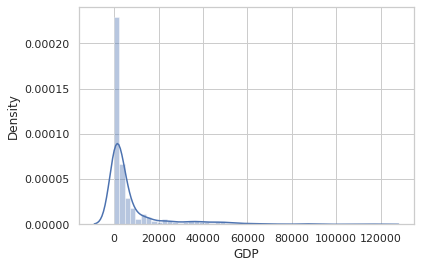

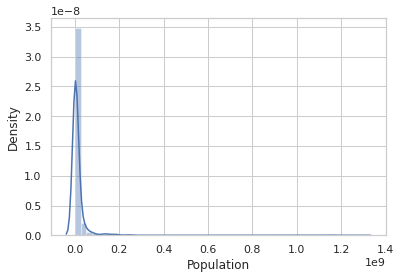

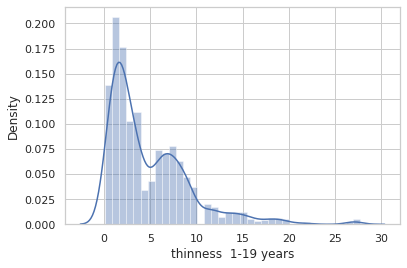

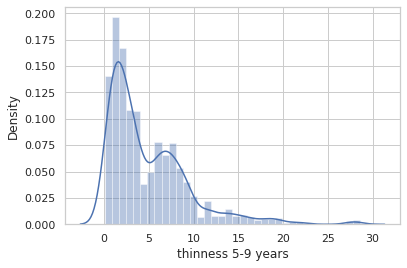

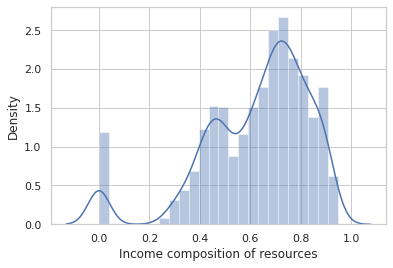

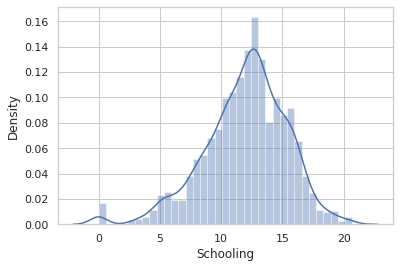

<Figure size 432x288 with 0 Axes>

In [147]:
for i in num_cols:
  sns.distplot(df[i])
  plt.figure()

In [148]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


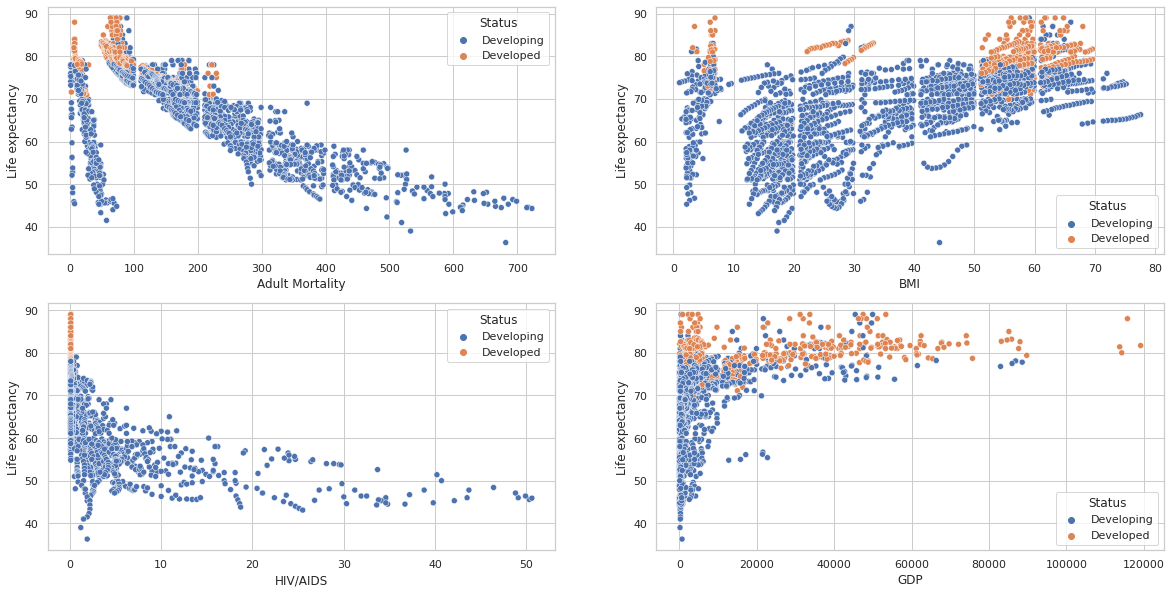

In [149]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.scatterplot(y = "Life expectancy", x = "Adult Mortality", hue = "Status", data = df)

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.scatterplot(y = "Life expectancy", x = "BMI", hue = "Status", data = df)

plt.subplot(223)
sns.set(style = 'whitegrid')
sns.scatterplot(y = "Life expectancy", x = "HIV/AIDS", hue = "Status", data = df)

plt.subplot(224)
sns.set(style = 'whitegrid')
sns.scatterplot(y = "Life expectancy", x = "GDP", hue = "Status", data = df)


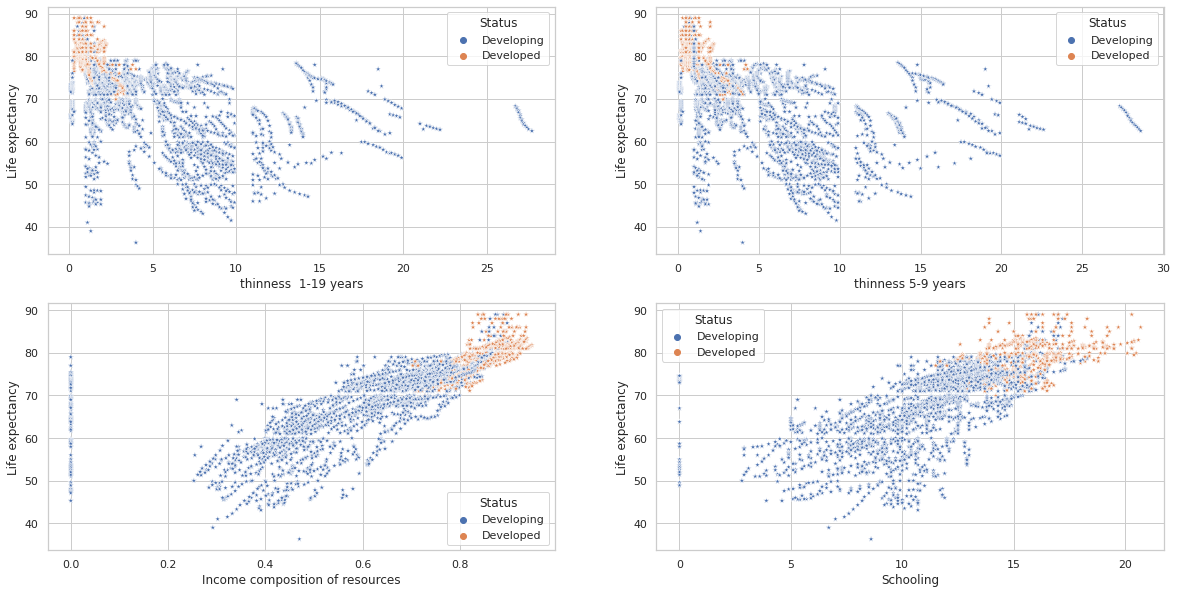

In [150]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.scatterplot(y = "Life expectancy", x = "thinness  1-19 years", hue = "Status", data = df)

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.scatterplot(y = "Life expectancy", x = "thinness 5-9 years", hue = "Status", data = df)

plt.subplot(223)
sns.set(style = 'whitegrid')
sns.scatterplot(y = "Life expectancy", x = "Income composition of resources", hue = "Status", data = df)

plt.subplot(224)
sns.set(style = 'whitegrid')
sns.scatterplot(y = "Life expectancy", x = "Schooling", hue = "Status", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


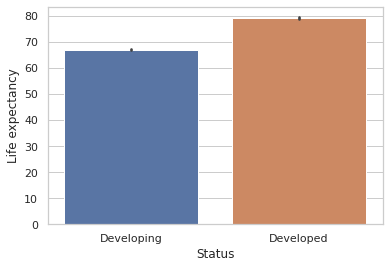

In [151]:
sns.barplot(df['Status'],df['Life expectancy'])

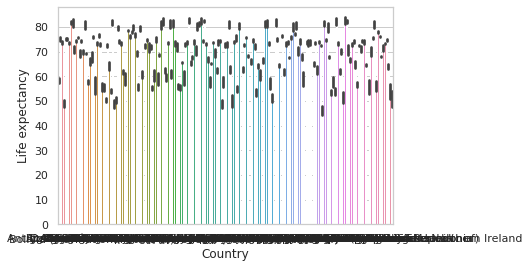

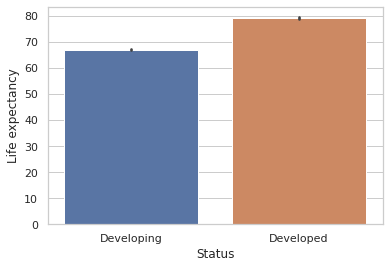

In [152]:
for i in cat_cols:
  sns.barplot(x = df[i], y = "Life expectancy", data = df)
  plt.show()

###Handling Missing Values

In [153]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

###Missing values in Life expectancy

In [154]:
df["Life expectancy"].median()

72.1

In [155]:
df["Life expectancy"].mean()

69.22493169398912

In [156]:
df["Life expectancy"].fillna(df["Life expectancy"].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


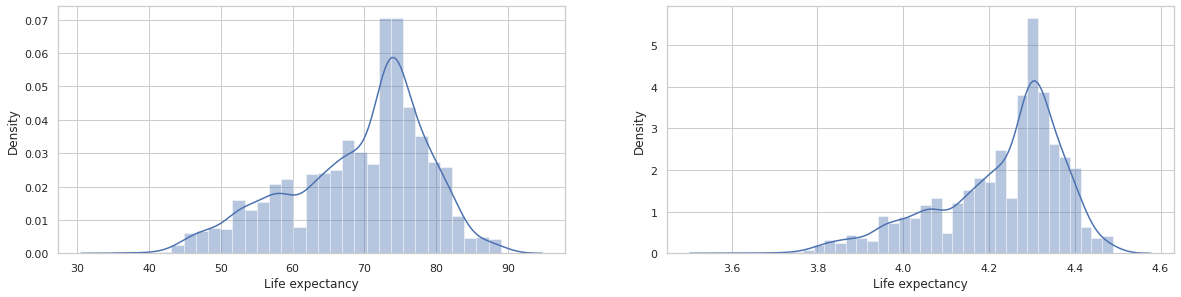

In [157]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Life expectancy"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Life expectancy"]))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


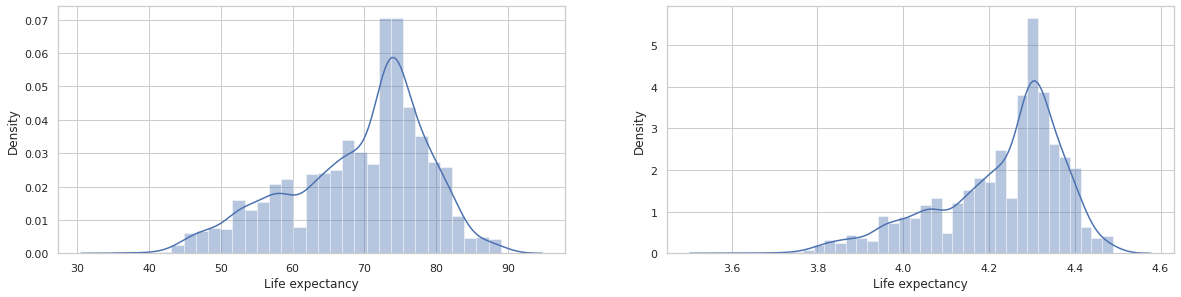

In [158]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Life expectancy"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Life expectancy"]))

###Missing values in Adult Mortality

In [159]:
df["Adult Mortality"].mean()

164.79644808743168

In [160]:
df["Adult Mortality"].fillna(df["Adult Mortality"].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


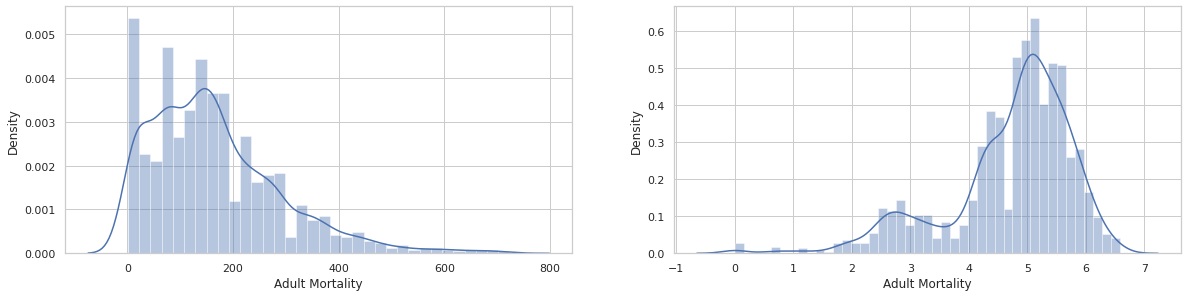

In [161]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Adult Mortality"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Adult Mortality"]))

In [162]:
df["Adult Mortality"] = np.log(df["Adult Mortality"])

###Missing values in Alcohol

In [163]:
df["Alcohol"].mean()

4.6028607871720375

In [164]:
df["Alcohol"].fillna(df["Alcohol"].mean(), inplace=True)

In [165]:
df["Alcohol"].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


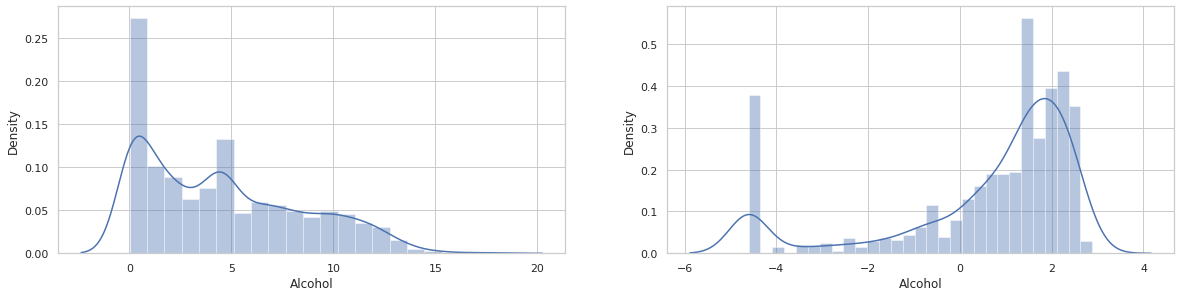

In [166]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Alcohol"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Alcohol"]))

In [167]:
df["Alcohol"] = np.log(df["Alcohol"])

###Missing values in Hepatitis B

In [168]:
df["Hepatitis B"].mean()

80.94046121593291

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


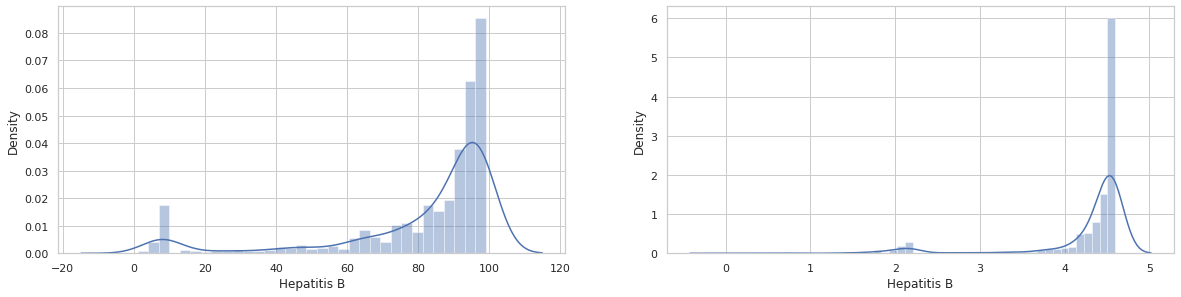

In [169]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Hepatitis B"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Hepatitis B"]))

In [170]:
df["Hepatitis B"].fillna(df["Hepatitis B"].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


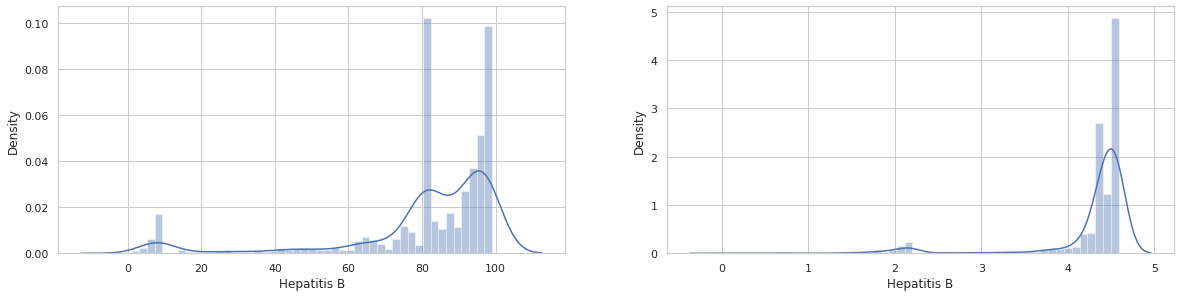

In [171]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Hepatitis B"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Hepatitis B"]))

In [172]:
df["Hepatitis B"] = np.log(df["Hepatitis B"])

###Missing values in BMI

In [173]:
df["BMI"].mode()[0]

58.5

In [174]:
df["BMI"].mean()

38.32124655647373

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


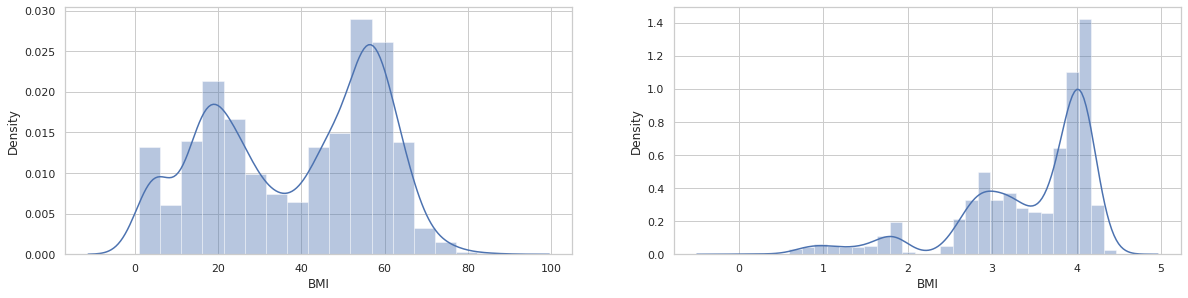

In [175]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["BMI"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["BMI"]))

In [176]:
df["BMI"].fillna(df["BMI"].mean(), inplace=True)

In [177]:
df["BMI"].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


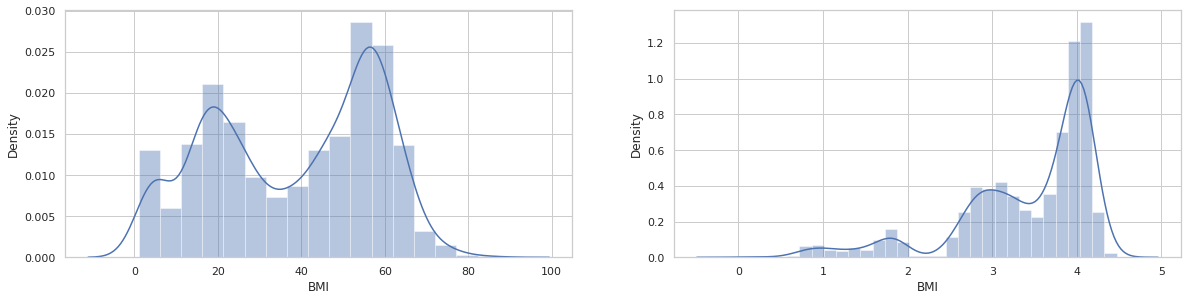

In [178]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["BMI"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["BMI"]))

###Missing values in Polio

In [179]:
df["Polio"].mode()[0]

99.0

In [180]:
df["Polio"].mean()

82.55018842069202

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


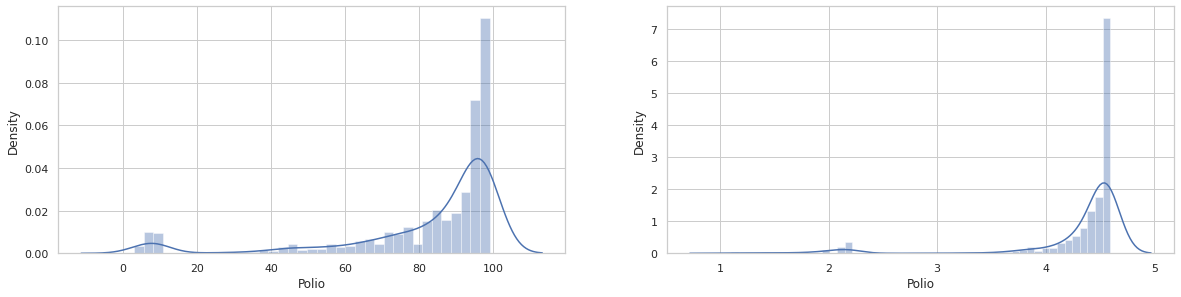

In [181]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Polio"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Polio"]))

In [182]:
df["Polio"].fillna(df["Polio"].mean(), inplace=True)

In [183]:
df["Polio"].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


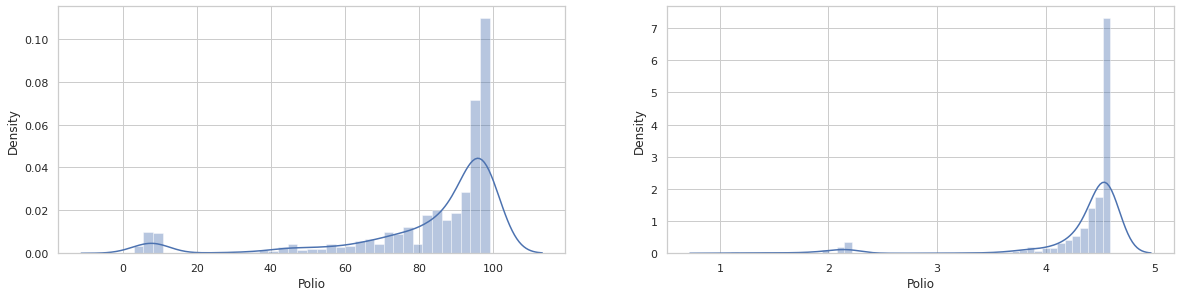

In [184]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Polio"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Polio"]))

In [185]:
df["Polio"] = np.log(df["Polio"])

###Missing values in Total expenditure 

In [186]:
df["Total expenditure"].mean()

5.9381895280235915

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


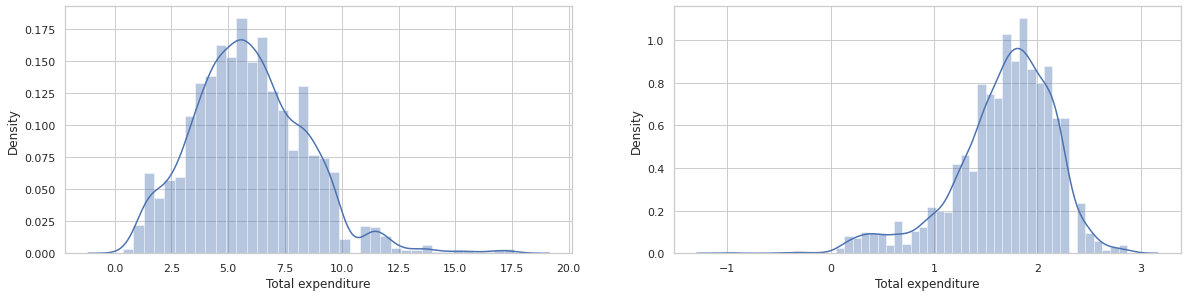

In [187]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Total expenditure"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Total expenditure"]))

In [188]:
df["Total expenditure"].fillna(df["Total expenditure"].mean(), inplace=True)

In [189]:
df["Polio"].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


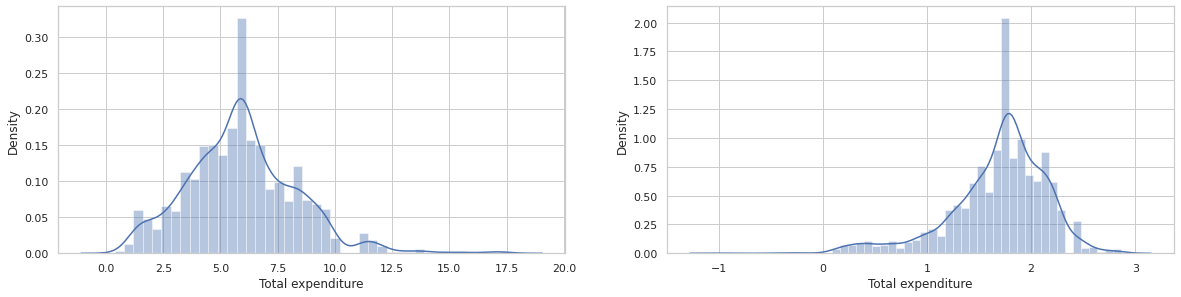

In [190]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Total expenditure"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Total expenditure"]))

###Missing values in Diphtheria

In [191]:
df["Diphtheria"].mean()

82.32408359027065

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


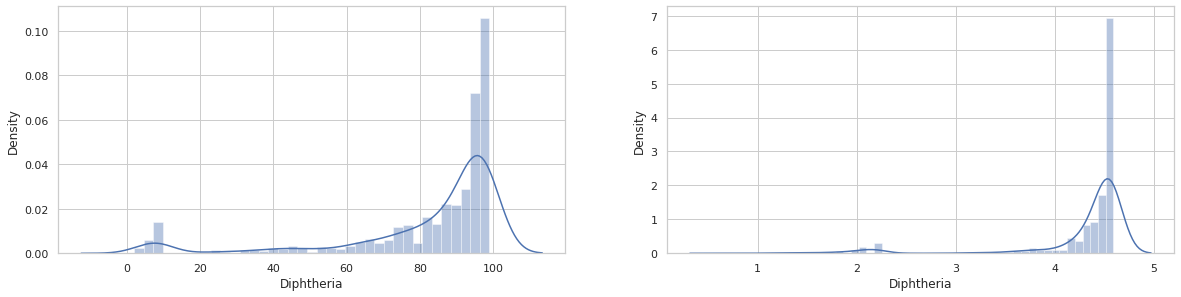

In [192]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Diphtheria"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Diphtheria"]))

In [193]:
df["Diphtheria"].fillna(df["Diphtheria"].mean(), inplace=True)

In [194]:
df["Diphtheria"].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


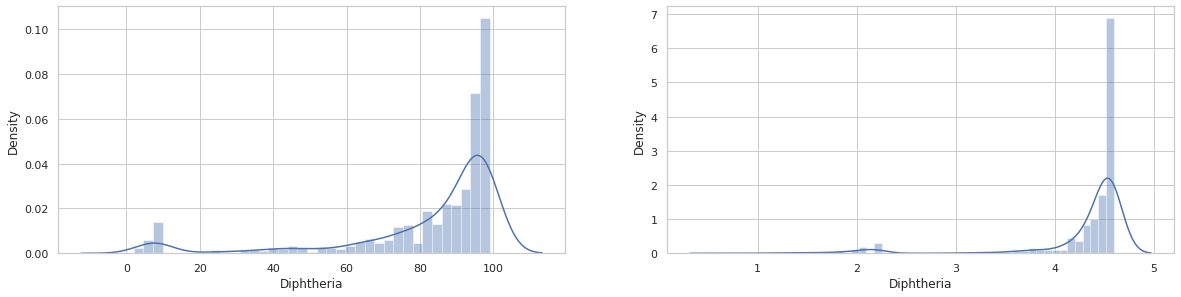

In [195]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Diphtheria"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Diphtheria"]))

In [196]:
df["Diphtheria"] = np.log(df["Diphtheria"])

###Missing values in GDP

In [197]:
df["GDP"].median()

1766.947595

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


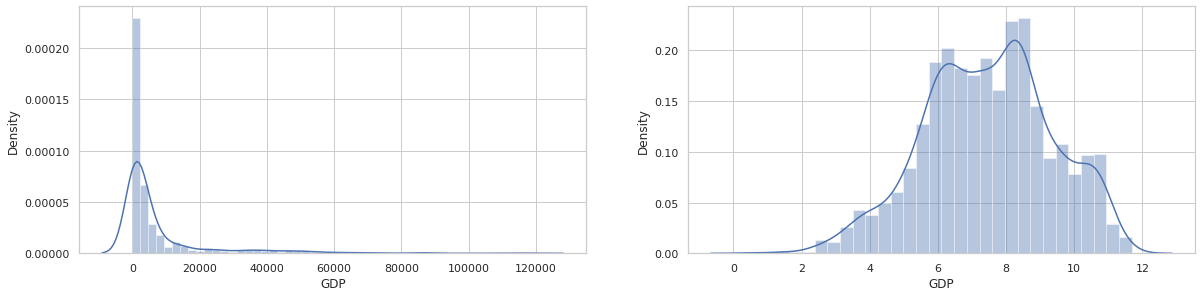

In [198]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["GDP"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["GDP"]))

In [199]:
df["GDP"].fillna(df["GDP"].median(), inplace=True)

In [200]:
df["GDP"].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


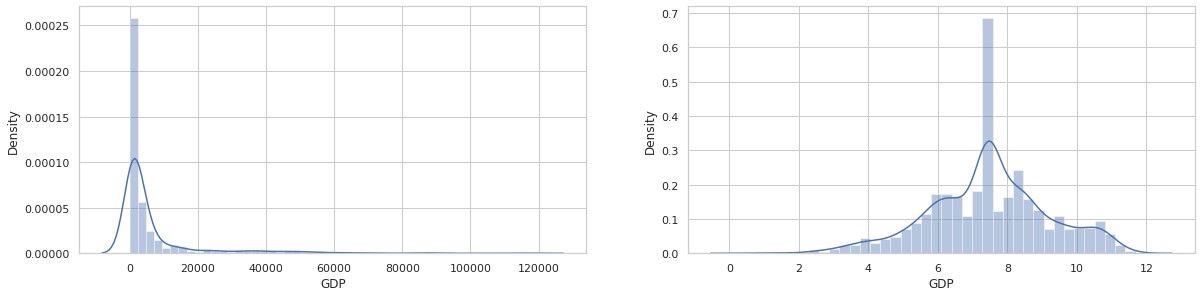

In [201]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["GDP"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["GDP"]))

In [202]:
df["GDP"] = np.log(df["GDP"])

###Missing values in Population

In [203]:
df["Population"].median()

1386542.0

In [204]:
df[df["Population"] > 1386542].shape

(1143, 22)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


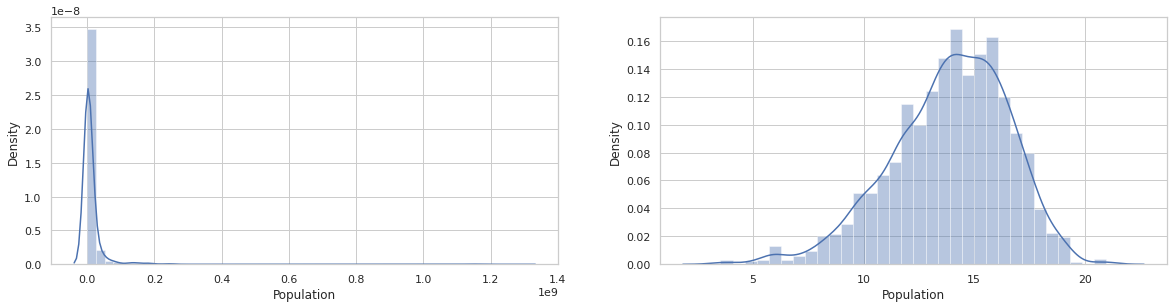

In [205]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Population"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Population"]))

In [206]:
df["Population"].fillna(df["Population"].median(), inplace=True)

In [207]:
df["Population"].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


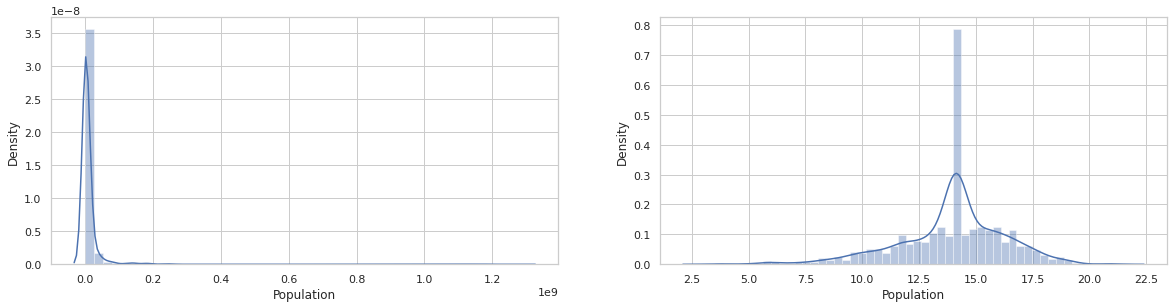

In [208]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Population"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["Population"]))

In [209]:
df["Population"] = np.log(df["Population"])

###Missing Values in thinness  1-19 years

In [210]:
df["thinness  1-19 years"].median()

3.3

In [211]:
df["thinness  1-19 years"].mean()

4.8397038567493205

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


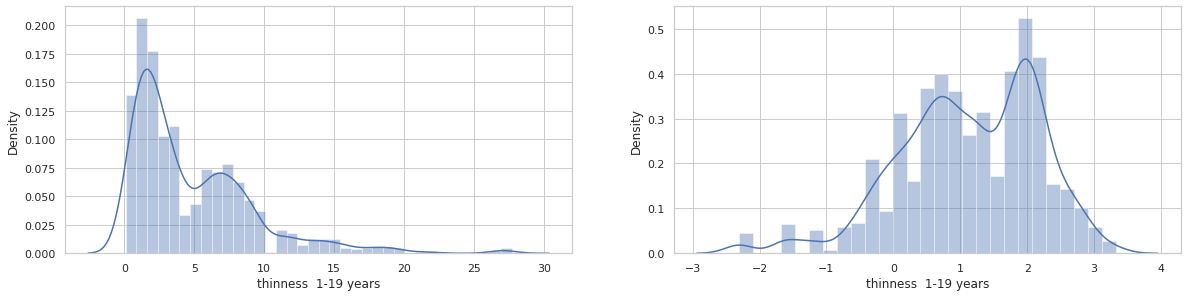

In [212]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["thinness  1-19 years"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["thinness  1-19 years"]))

In [213]:
df["thinness  1-19 years"].fillna(df["thinness  1-19 years"].mean(), inplace=True)

In [214]:
df["thinness  1-19 years"].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


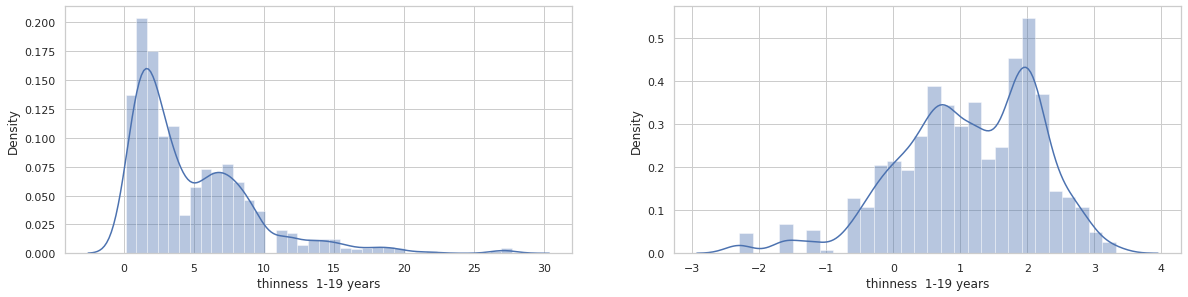

In [215]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["thinness  1-19 years"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["thinness  1-19 years"]))

In [216]:
df["thinness  1-19 years"] = np.log(df["thinness  1-19 years"])

###Missing values in thinness 5-9 years

In [217]:
df["thinness 5-9 years"].mean()

4.870316804407711

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


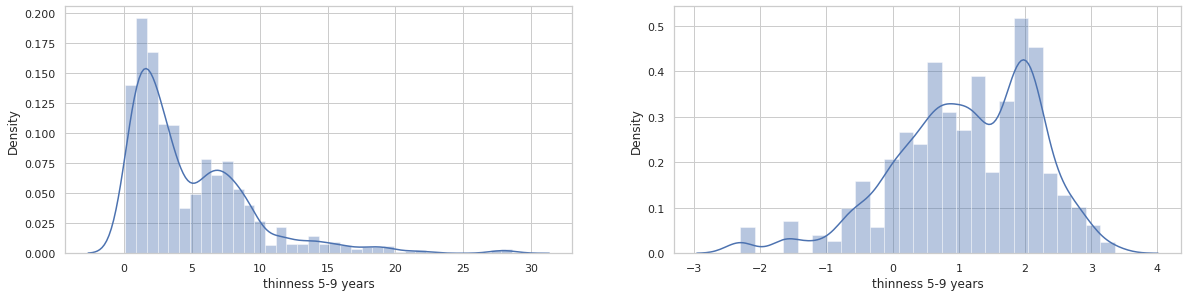

In [218]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["thinness 5-9 years"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["thinness 5-9 years"]))

In [219]:
df["thinness 5-9 years"].fillna(df["thinness 5-9 years"].mean(), inplace=True)

In [220]:
df["thinness 5-9 years"].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


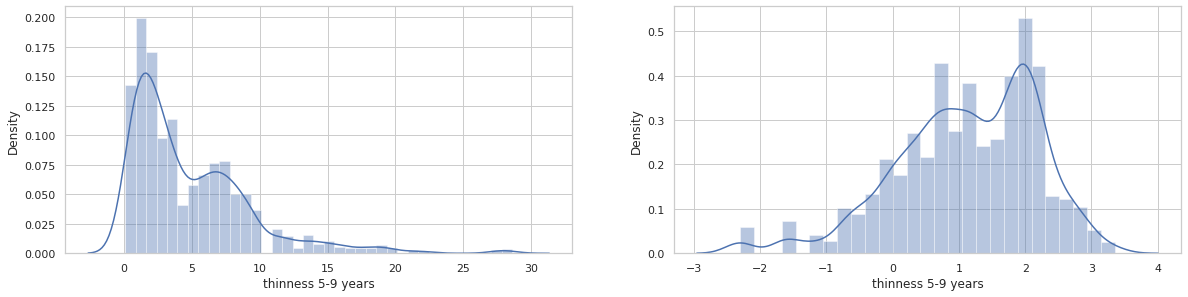

In [221]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["thinness 5-9 years"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.log(df["thinness 5-9 years"]))

In [222]:
df["thinness 5-9 years"] = np.log(df["thinness 5-9 years"])

###Missing values in Income composition of resources

In [223]:
df["Income composition of resources"].median()

0.677

In [224]:
df["Income composition of resources"].mean()

0.6275510645976166

In [225]:
df["Income composition of resources"].fillna(df["Income composition of resources"].median(), inplace = True)

In [226]:
df["Income composition of resources"].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


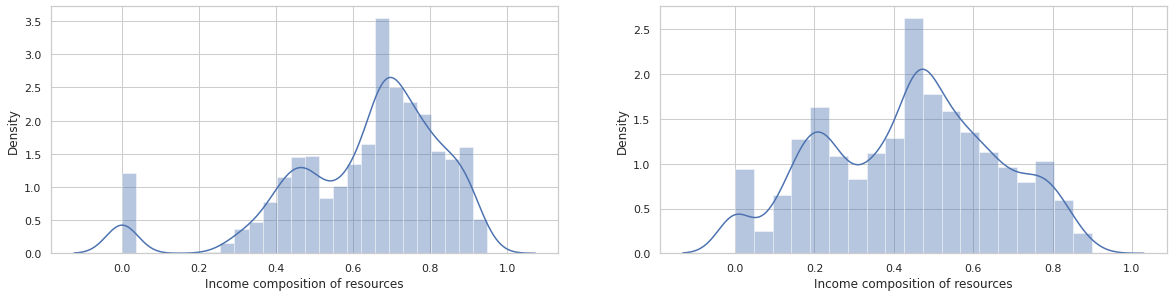

In [227]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Income composition of resources"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.square(df["Income composition of resources"]))

In [228]:
df["Income composition of resources"] = np.square(df["Income composition of resources"])

###Missing values in Schooling

In [229]:
df["Schooling"].median()

12.3

In [230]:
df["Schooling"].mean()

11.992792792792786

In [231]:
df["Schooling"].fillna(df["Schooling"].median(), inplace = True)

In [232]:
df["Schooling"].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


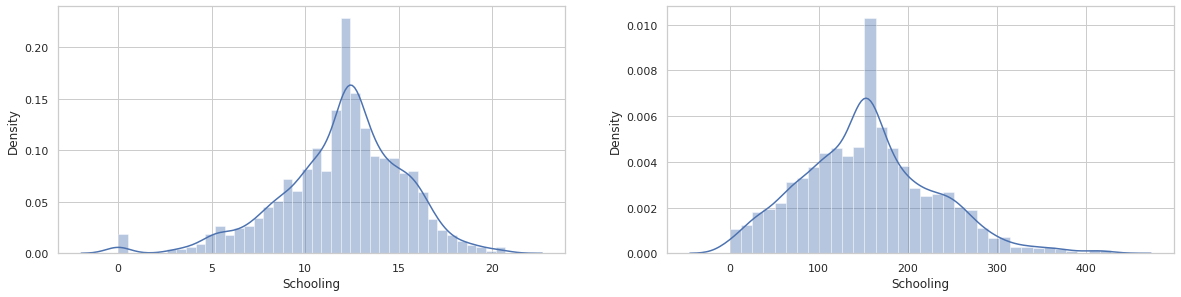

In [233]:
plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.set(style = 'whitegrid')
sns.distplot(df["Schooling"])

plt.subplot(222)
sns.set(style = 'whitegrid')
sns.distplot(np.square(df["Schooling"]))

In [234]:
df["Schooling"] = np.square(df["Schooling"])

In [235]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Handling the Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

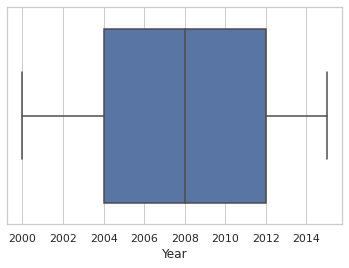

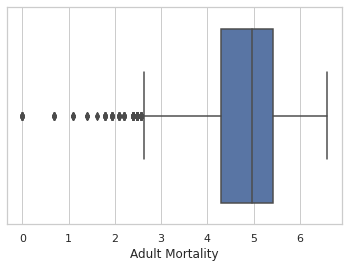

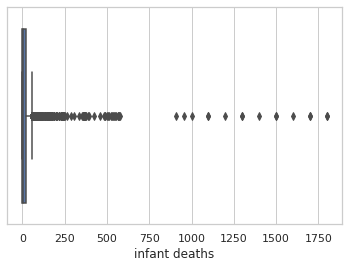

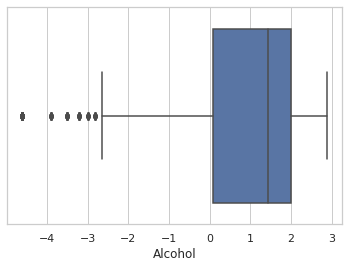

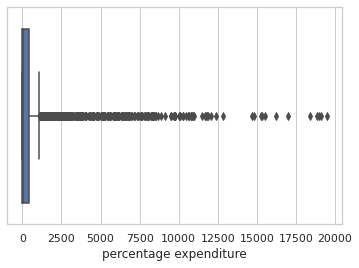

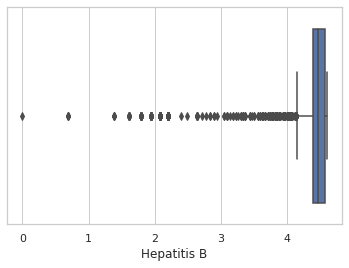

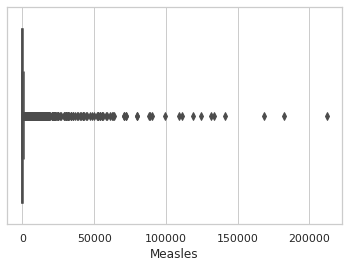

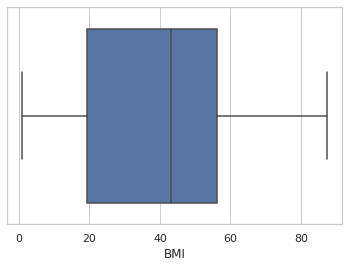

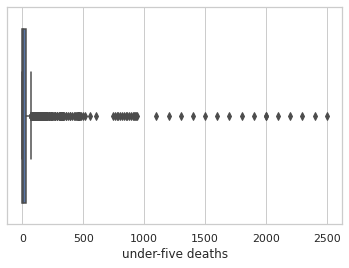

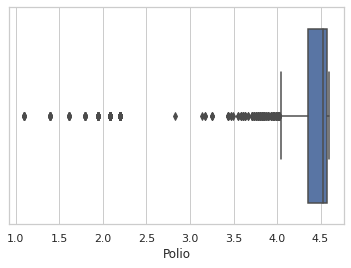

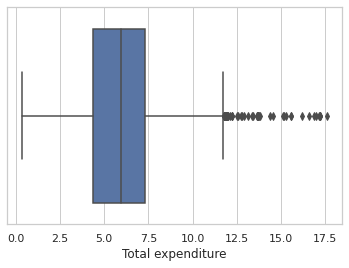

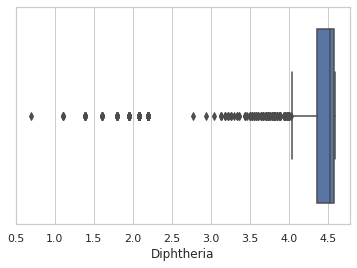

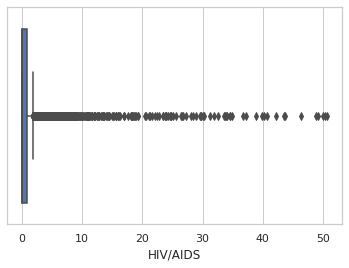

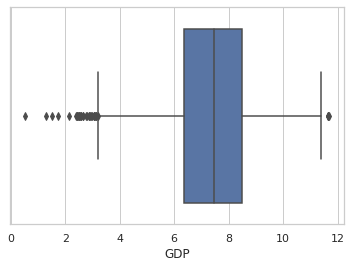

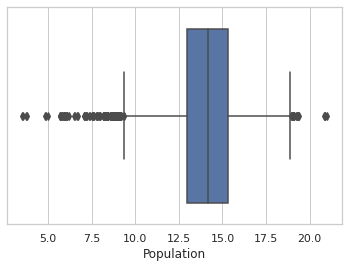

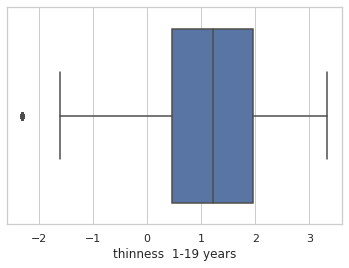

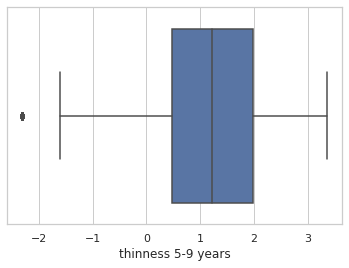

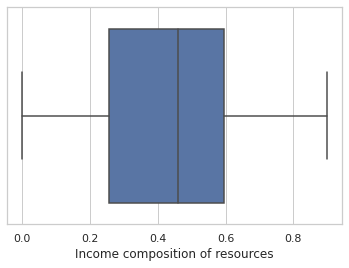

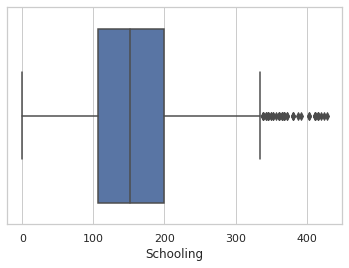

<Figure size 432x288 with 0 Axes>

In [236]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.figure()

In [237]:
from scipy import stats

In [238]:
for i in num_cols:
  df[i] = stats.zscore(df[i])

In [ ]:
for i in num_cols:
  sns.distplot(df[i])
  plt.figure()

In [240]:
#for i in num_cols:

  #Q1 = df[i].quantile(0.25)
  #Q3 = df[i].quantile(0.75)
#
  #IQR = Q3 - Q1
#
  #UB = Q3 + 1.5 *IQR
  #LB = Q1 - 1.5 *IQR
#
  #outliers = df[(df[i] > UB) or (df[i] < LB)].index

  #df[i] = df[i].replace(s, df[i].median)
  
  #sns.boxplot(df[i])
  #plt.figure()
 

In [242]:
df.shape

(2938, 22)

In [243]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1.621762,Developing,65.0,0.804835,0.268824,-2.449478,-0.335570,-0.191392,-0.110384,-0.964715,0.255359,-4.078012,0.925806,-0.203199,-0.323445,-0.635329,1.441770,1.647250,1.612554,-0.968307,-0.716857
1,Afghanistan,1.404986,Developing,59.9,0.832783,0.285786,-2.449478,-0.334441,-0.269647,-0.168124,-0.989810,0.274060,-0.398104,0.934140,-0.279205,-0.323445,-0.607834,-0.531703,1.663902,1.623280,-0.981519,-0.744103
2,Afghanistan,1.188210,Developing,59.9,0.822401,0.302749,-2.449478,-0.334594,-0.217068,-0.173531,-1.014905,0.292761,-0.289928,0.913306,-0.228137,-0.323445,-0.590122,1.415683,1.674846,1.633884,-1.007693,-0.771078
3,Afghanistan,0.971434,Developing,59.5,0.836218,0.328193,-2.449478,-0.332096,-0.141203,0.032045,-1.040000,0.317696,-0.164125,1.075815,-0.154452,-0.323445,-0.556144,0.500267,1.685666,1.649568,-1.037810,-0.797782
4,Afghanistan,0.754658,Developing,59.2,0.846449,0.345155,-2.449478,-0.367862,-0.116668,0.051757,-1.060076,0.342631,-0.140094,0.804966,-0.130622,-0.323445,-1.918929,0.408267,1.701672,1.659880,-1.075867,-0.876268


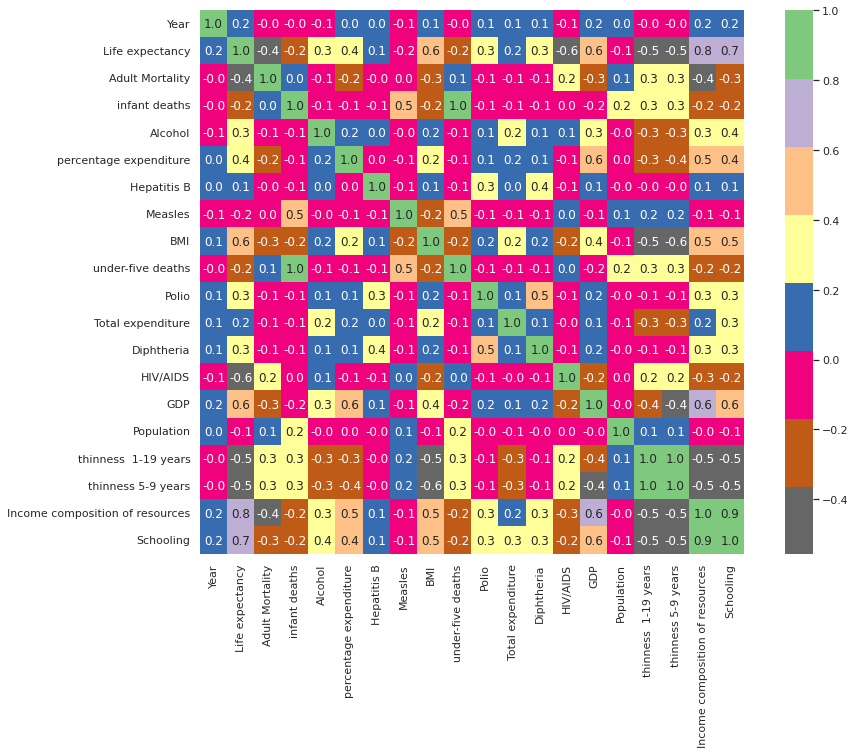

In [244]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = "Accent_r", annot = True, fmt = ".1f", square = True)

### Linear Regression Model

In [245]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [246]:
df["Status"] = pd.get_dummies(df["Status"], drop_first = True)

In [247]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1.621762,1,65.0,0.804835,0.268824,-2.449478,-0.335570,-0.191392,-0.110384,-0.964715,0.255359,-4.078012,0.925806,-0.203199,-0.323445,-0.635329,1.441770,1.647250,1.612554,-0.968307,-0.716857
1,Afghanistan,1.404986,1,59.9,0.832783,0.285786,-2.449478,-0.334441,-0.269647,-0.168124,-0.989810,0.274060,-0.398104,0.934140,-0.279205,-0.323445,-0.607834,-0.531703,1.663902,1.623280,-0.981519,-0.744103
2,Afghanistan,1.188210,1,59.9,0.822401,0.302749,-2.449478,-0.334594,-0.217068,-0.173531,-1.014905,0.292761,-0.289928,0.913306,-0.228137,-0.323445,-0.590122,1.415683,1.674846,1.633884,-1.007693,-0.771078
3,Afghanistan,0.971434,1,59.5,0.836218,0.328193,-2.449478,-0.332096,-0.141203,0.032045,-1.040000,0.317696,-0.164125,1.075815,-0.154452,-0.323445,-0.556144,0.500267,1.685666,1.649568,-1.037810,-0.797782
4,Afghanistan,0.754658,1,59.2,0.846449,0.345155,-2.449478,-0.367862,-0.116668,0.051757,-1.060076,0.342631,-0.140094,0.804966,-0.130622,-0.323445,-1.918929,0.408267,1.701672,1.659880,-1.075867,-0.876268


In [248]:
df.dtypes

Country                             object
Year                               float64
Status                               uint8
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                      float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                            float64
BMI                                float64
under-five deaths                  float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [268]:
x = df.drop(["Life expectancy", "Country"], axis = 1)
y = df["Life expectancy"]

In [250]:
x.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [251]:
std = StandardScaler()
x = std.fit_transform(x)

In [252]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 122)

In [253]:
x_train

array([[-1.19632639,  0.45939851,  0.81190112, ..., -0.73365646,
        -1.01634367, -1.23209539],
       [-0.32922217,  0.45939851,  0.81891386, ..., -0.12076888,
         0.33769941,  0.82953738],
       [ 1.6217623 ,  0.45939851,  0.88628537, ...,  0.65497381,
        -0.94610343, -0.14766761],
       ...,
       [-1.41310244, -2.17675935, -0.36537912, ..., -1.69446739,
         1.13513281,  0.90978503],
       [ 0.75465809,  0.45939851,  0.15479069, ...,  1.49179126,
        -0.0479533 , -0.14766761],
       [ 1.40498625,  0.45939851,  0.22340176, ...,  1.4794312 ,
         0.63717963,  0.55721045]])

In [254]:
y_train

1439    59.3
2739    67.7
2617    59.9
1240    74.0
1403    73.6
        ... 
1807    54.7
876     72.8
1296    79.8
2878    75.4
2442    74.7
Name: Life expectancy, Length: 2350, dtype: float64

In [255]:
model = LinearRegression()

In [256]:
model.fit(x_train, y_train)

LinearRegression()

In [257]:
x_train_pred = model.predict(x_train)


In [258]:
print(metrics.r2_score(y_train, x_train_pred))

0.7975786560524889


In [259]:
print('MAE', metrics.mean_absolute_error(y_train, x_train_pred))
print('MSE', metrics.mean_squared_error(y_train, x_train_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train, x_train_pred)))

MAE 3.1478548632299512
MSE 18.214058804932627
RMSE 4.267793200816158


In [260]:
x_test_pred = model.predict(x_test)

In [261]:
print(metrics.r2_score(y_test, x_test_pred))

0.811573079879007


In [262]:
print('MAE', metrics.mean_absolute_error(y_test, x_test_pred))
print('MSE', metrics.mean_squared_error(y_test, x_test_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, x_test_pred)))

MAE 3.136055846400693
MSE 17.272517719504464
RMSE 4.156021862250542


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


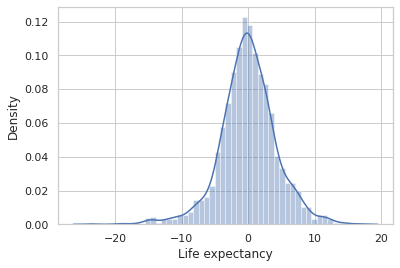

In [263]:
residual = y_train - x_train_pred

sns.distplot(residual)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


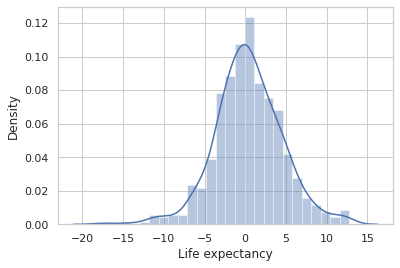

In [264]:
residual = y_test - x_test_pred

sns.distplot(residual)

###Ridge Regression

In [265]:
from sklearn.linear_model import Lasso, Ridge

In [266]:
ridge = Ridge(alpha = 10)
ridge.fit(x_train, y_train)

Ridge(alpha=10)

In [269]:
r_coeff = pd.DataFrame()
r_coeff["columns"] = x.columns
r_coeff["Estimate"] = pd.Series(ridge.coef_)
r_coeff

,columns,Estimate
0,Year,-0.079156
1,Status,-0.225758
2,Adult Mortality,-0.988080
3,infant deaths,6.211774
4,Alcohol,0.224934
5,percentage expenditure,-0.018141
6,Hepatitis B,-0.213180
7,Measles,-0.230564
8,BMI,0.804035
9,under-five deaths,-6.394693


<Figure size 1440x1440 with 0 Axes>

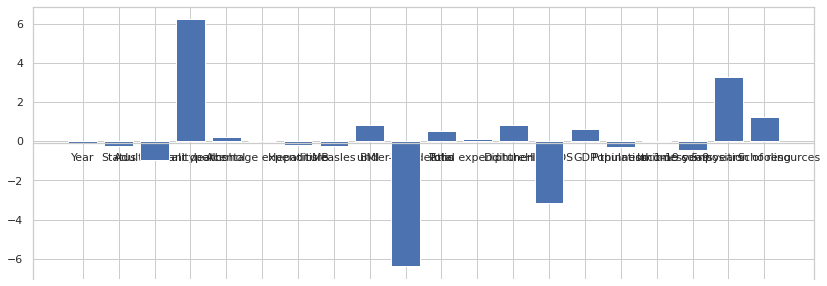

In [274]:
plt.figure(figsize = (20, 20))
fix, ax = plt.subplots(figsize=(14,5))
ax.bar(r_coeff['columns'],r_coeff['Estimate'])
ax.spines['bottom'].set_position('center')
plt.show()

In [271]:
from sklearn.metrics import mean_squared_error,r2_score

In [272]:
y_train_pred = ridge.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
Rsqr_train = round(r2_score(y_train,y_train_pred)*100,2)

print('modelName:', ridge)
print('-'*40)
print('RMSE is: ',rmse_train)
print('RSquared is: '+str(Rsqr_train)+'%')

print('\n')

# Evaluation metrics for test dataset


y_test_pred = ridge.predict(x_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_test_pred))
Rsqr_test = round(r2_score(y_test,y_test_pred)*100,2)


print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

modelName: Ridge(alpha=10)
----------------------------------------
RMSE is:  4.321380041728114
RSquared is: 79.25%


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.180789189635407
RSquared is: 80.93%


In [275]:
alphas = []
train_errs = []
test_errs = []
train_score = []
test_score = []

for alpha_value in np.arange(0, 10, 0.5):
    iter_alpha_value = alpha_value

    ridge = Ridge(alpha=iter_alpha_value)
    ridge.fit(x_train, y_train)
    y_pred_ridge = ridge.predict(x_test)
    y_pred_train = ridge.predict(x_train)
    alphas.append(iter_alpha_value)
    
    # Finding the train and test data Scores for every aplha
    test_r2 = metrics.r2_score(y_pred_train, y_train)
    train_r2  = metrics.r2_score(y_pred_ridge, y_test)
    train_score.append(train_r2)
    test_score.append(test_r2)

    print('modelName:', ridge)
    print('-'*40)
    print('RMSE is: ',rmse_train)
    print('RSquared is: '+str(Rsqr_train)+'%')

    print('\n')
    
    # Finding the train and test errors for every alpha
    train_err = np.mean((y_pred_train - y_train)**2)
    square_err  = np.mean((y_pred_ridge - y_test)**2)
    train_errs.append(train_err)
    test_errs.append(square_err)

    
    print('Evaluation metrics for Testing Dataset')
    print('-'*40)
    print('RMSE is: ',rmse_test)
    print('RSquared is: '+str(Rsqr_test)+'%')

modelName: Ridge(alpha=0.0)
----------------------------------------
RMSE is:  4.321380041728114
RSquared is: 79.25%


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.180789189635407
RSquared is: 80.93%
modelName: Ridge(alpha=0.5)
----------------------------------------
RMSE is:  4.321380041728114
RSquared is: 79.25%


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.180789189635407
RSquared is: 80.93%
modelName: Ridge()
----------------------------------------
RMSE is:  4.321380041728114
RSquared is: 79.25%


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.180789189635407
RSquared is: 80.93%
modelName: Ridge(alpha=1.5)
----------------------------------------
RMSE is:  4.321380041728114
RSquared is: 79.25%


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.180789189635407
RSquared is: 80.93%
modelName: Ridge(alph

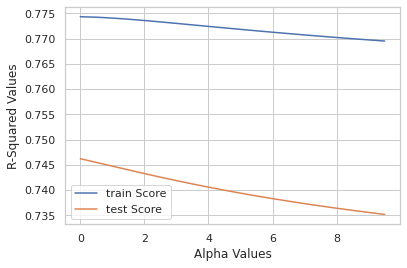

In [276]:
plt.plot(alphas, train_score,  label='train Score')
plt.plot(alphas, test_score,  label='test Score')
plt.xlabel("Alpha Values")
plt.ylabel("R-Squared Values")
plt.legend()

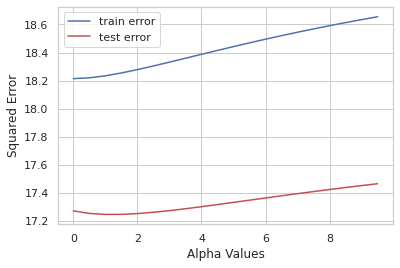

In [277]:
plt.plot(alphas, train_errs, color='b', label='train error')
plt.plot(alphas, test_errs, color='r', label='test error')
plt.xlabel("Alpha Values")
plt.ylabel("Squared Error")
plt.legend()

###Lasso Regression

In [278]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

In [279]:
r_coeff = pd.DataFrame()
r_coeff["columns"] = x.columns
r_coeff["Estimate"] = pd.Series(lasso.coef_)
r_coeff

,columns,Estimate
0,Year,-0.064877
1,Status,-0.253178
2,Adult Mortality,-0.981672
3,infant deaths,11.615109
4,Alcohol,0.258189
5,percentage expenditure,0.000000
6,Hepatitis B,-0.167464
7,Measles,-0.204738
8,BMI,0.793612
9,under-five deaths,-11.845358


<Figure size 1080x720 with 0 Axes>

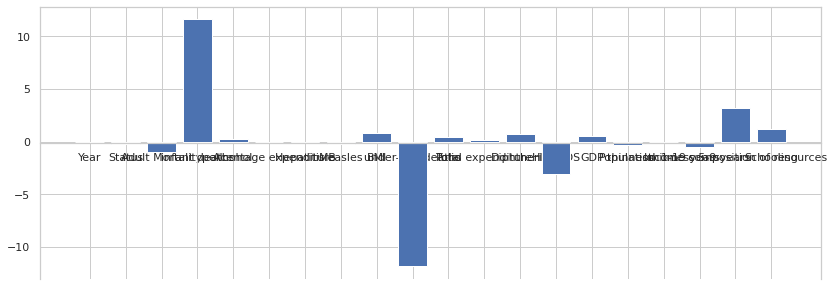

In [280]:

plt.figure(figsize = (15, 10))
fix, ax = plt.subplots(figsize=(14,5))
ax.bar(r_coeff['columns'],r_coeff['Estimate'])
ax.spines['bottom'].set_position('center')
plt.show()

In [281]:
y_train_pred = lasso.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
Rsqr_train = round(r2_score(y_train,y_train_pred)*100,2)

print('modelName:', lasso)
print('-'*40)
print('RMSE is: ',rmse_train)
print('RSquared is: '+str(Rsqr_train)+'%')

print('\n')

# Evaluation metrics for test dataset


y_test_pred = lasso.predict(x_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_test_pred))
Rsqr_test = round(r2_score(y_test,y_test_pred)*100,2)


print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

modelName: Lasso(alpha=0.01)
----------------------------------------
RMSE is:  4.275330139776848
RSquared is: 79.69%


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.1532574562438995
RSquared is: 81.18%


In [282]:
alphas = []
train_errs = []
test_errs = []
train_score = []
test_score = []

for alpha_value in np.arange(0, 10, 0.5):
    iter_alpha_value = alpha_value

    lasso =  Lasso(alpha = iter_alpha_value)
    lasso.fit(x_train, y_train)
    y_pred_lasso = lasso.predict(x_test)
    y_pred_train = lasso.predict(x_train)
    alphas.append(iter_alpha_value)
    
    # Finding the train and test data Scores for every aplha
    test_r2 = metrics.r2_score(y_pred_train, y_train)
    train_r2  = metrics.r2_score(y_pred_ridge, y_test)
    train_score.append(train_r2)
    test_score.append(test_r2)

    print('modelName:', lasso)
    print('-'*40)
    print('RMSE is: ',rmse_train)
    print('RSquared is: '+str(Rsqr_train)+'%')

    print('\n')
    
    # Finding the train and test errors for every alpha
    train_err = np.mean((y_pred_train - y_train)**2)
    square_err  = np.mean((y_pred_ridge - y_test)**2)
    train_errs.append(train_err)
    test_errs.append(square_err)

    
    print('Evaluation metrics for Testing Dataset')
    print('-'*40)
    print('RMSE is: ',rmse_test)
    print('RSquared is: '+str(Rsqr_test)+'%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+04, tolerance: 2.115e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coe

modelName: Lasso(alpha=0.0)
----------------------------------------
RMSE is:  4.275330139776848
RSquared is: 79.69%


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.1532574562438995
RSquared is: 81.18%
modelName: Lasso(alpha=0.5)
----------------------------------------
RMSE is:  4.275330139776848
RSquared is: 79.69%


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.1532574562438995
RSquared is: 81.18%
modelName: Lasso()
----------------------------------------
RMSE is:  4.275330139776848
RSquared is: 79.69%


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.1532574562438995
RSquared is: 81.18%
modelName: Lasso(alpha=1.5)
----------------------------------------
RMSE is:  4.275330139776848
RSquared is: 79.69%


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.1532574562438995
RSquared is: 81.18%
modelName: Lasso(

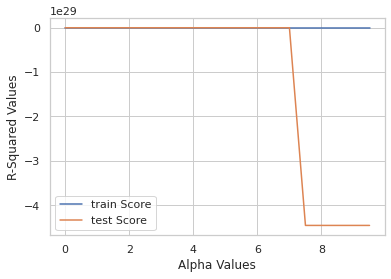

In [283]:

plt.plot(alphas, train_score,  label='train Score')
plt.plot(alphas, test_score,  label='test Score')
plt.xlabel("Alpha Values")
plt.ylabel("R-Squared Values")
plt.legend()

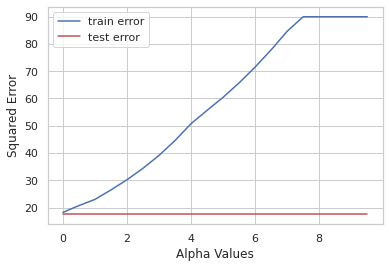

In [284]:
plt.plot(alphas, train_errs, color='b', label='train error')
plt.plot(alphas, test_errs, color='r', label='test error')
plt.xlabel("Alpha Values")
plt.ylabel("Squared Error")
plt.legend()

###KNN

In [285]:
from sklearn.neighbors import KNeighborsRegressor

In [286]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 34)

In [287]:
y_train = y_train.astype(int)

In [288]:
X_train = X_train.astype(int)

In [293]:
train_acc = []
for i in range(1, 10):
  knn = KNeighborsRegressor(n_neighbors = i)
  knn.fit(X_train, y_train)
  x_train_pred_knn = knn.predict(X_train)
  print(metrics.r2_score(y_train, x_train_pred_knn))
  acc = metrics.r2_score(y_train, x_train_pred_knn)
  train_acc.append(acc)

0.9021310642777957
0.8887905277986233
0.8675662965050925
0.850798174966063
0.8420842975443423
0.8310833793733006
0.8233483899721199
0.814935923418849
0.8053312456233667


In [294]:
test_acc = []
for i in range(1, 10):
  knn = KNeighborsRegressor(n_neighbors = i)
  knn.fit(X_train, y_train)
  x_test_pred_knn = knn.predict(X_test)
  print(metrics.r2_score(y_test, x_test_pred_knn))
  acc_1 = metrics.r2_score(y_test, x_test_pred_knn)
  test_acc.append(acc_1)


0.5622026389333277
0.6472817567735525
0.6978257957284287
0.724931159367924
0.7296519500428775
0.7482454861514032
0.7587940562179928
0.7635236118781352
0.7680176756075953


In [295]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)
x_train_pred_knn = knn.predict(X_train)
print(metrics.r2_score(y_train, x_train_pred_knn))
x_test_pred_knn = knn.predict(X_test)
print(metrics.r2_score(y_test, x_test_pred_knn))

0.7998820624146796
0.7663786668367769


In [297]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
x_train_pred_knn = knn.predict(X_train)
print(metrics.r2_score(y_train, x_train_pred_knn))
x_test_pred_knn = knn.predict(X_test)
print(metrics.r2_score(y_test, x_test_pred_knn))

0.8420842975443423
0.7296519500428775


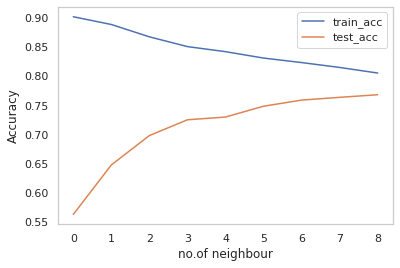

In [296]:
plt.plot(train_acc)
plt.plot(test_acc)
plt.xlabel('no.of neighbour')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(['train_acc','test_acc'])
plt.show();

###Hyperparameter Tuning

In [298]:
from sklearn.model_selection import GridSearchCV

In [299]:
knn_1 = KNeighborsRegressor()

In [300]:
params = {
    "n_neighbors" : range(1, 11),
    "leaf_size" : range(1, 20)
    }

In [301]:
grid_search = GridSearchCV(estimator = knn_1, param_grid = params, cv = 10, verbose = 1, error_score = 'raise', return_train_score = True)

In [302]:
grid_search.fit(X_train, y_train) 

Fitting 10 folds for each of 190 candidates, totalling 1900 fits


GridSearchCV(cv=10, error_score='raise', estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': range(1, 20),
                         'n_neighbors': range(1, 11)},
             return_train_score=True, verbose=1)

In [303]:
score_df = pd.DataFrame(grid_search.cv_results_)

In [304]:
df_best = grid_search.best_estimator_

In [305]:
df_best

KNeighborsRegressor(leaf_size=1, n_neighbors=3)

In [315]:
knn_best_model = KNeighborsRegressor(leaf_size = 1, n_neighbors = 7)

In [316]:

knn_best_model.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=1, n_neighbors=7)

In [317]:
x_train_pred = knn_best_model.predict(x_train)
print(metrics.r2_score(y_train, x_train_pred_knn))

0.8420842975443423


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [318]:
x_test_pred = knn_best_model.predict(x_test)
print(metrics.r2_score(y_test, x_test_pred_knn))

0.7296519500428775


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


###Decision Tree

In [422]:
from sklearn.tree import DecisionTreeRegressor

In [423]:
from sklearn.feature_selection import RFE

In [434]:
x = df.drop(["Life expectancy", "Country"], axis = 1)
y = df["Life expectancy"]

In [425]:
std = StandardScaler()
x = std.fit_transform(x)

In [426]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 112)

In [427]:
model_1 = DecisionTreeRegressor()
model_1.fit(x_train, y_train)

DecisionTreeRegressor()

In [428]:
x_train_pred = model_1.predict(x_train)
print(metrics.r2_score(y_train, x_train_pred))

1.0


In [429]:
x_test_pred = model_1.predict(x_test)
print(metrics.r2_score(y_test, x_test_pred))

0.9184028382514948


In [430]:
rfe = RFE(model_1, n_features_to_select = 8)

In [431]:
rfe.fit(X_train, y_train)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=8)

In [432]:
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

8
[ True False  True False False False False False False False False  True
 False False  True  True False  True  True  True]
[ 1 11  1 12  4  6  2  7  5 13  9  1  8 10  1  1  3  1  1  1]


In [435]:
for i,X in enumerate(rfe.ranking_):
  if X == 1:
    print(x.columns[i])

Year
Adult Mortality
Total expenditure
GDP
Population
thinness 5-9 years
Income composition of resources
Schooling


In [438]:
feature_cols = ["Year", "Adult"" Mortality", "Total expenditure", "GDP", "Population", "thinness 5-9 years", "Income composition of resources", "Schooling"]

In [439]:
x = df[feature_cols]
y = df["Life expectancy"]

In [440]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 112)

In [441]:
model_2 = DecisionTreeRegressor()

In [442]:
x_train = x_train.astype(int)
y_train = y_train.astype(int)

In [443]:
model_2.fit(x_train, y_train)

DecisionTreeRegressor()

In [444]:
x_train_pred = model_2.predict(x_train)
print(metrics.r2_score(y_train, x_train_pred))

0.8742551627717873


In [445]:
x_test_pred = model_2.predict(x_test)
print(metrics.r2_score(y_test, x_test_pred))

0.32878750624112096


###Hyperparameter Tuning

In [399]:
params = {
    "criterion" : ["squared_error", "absolute_error"],
    "max_depth" : range(2, 20, 1),
    "min_samples_leaf" : range(1, 6, 1),
    "min_samples_split" : range(2, 6, 1),
    "splitter" : ["best", "random"],
    "max_features" : range(1, 10),
}

In [400]:
grid = GridSearchCV(estimator = model_1, param_grid = params, cv = 10, verbose = 1, error_score = 'raise', return_train_score = True)

In [ ]:
best_params = grid.best_params_
print(best_params)

In [ ]:
grid.best_score_

In [ ]:
best_tree = DecisionTreeRegressor(criterion = 'gini', max_depth = 13, min_samples_leaf = 1, min_samples_split = 4, splitter = 'random')

In [ ]:
best_tree.fit(x_train, y_train)

In [ ]:
x_train_pred = best_tree.predict(x_train)
x_test_pred = best_tree.predict(x_test)

In [ ]:
print("Accuracy on Training Data", metrics.r2_score(y_train, x_train_pred))
print("Accuracy on Testing Data", metrics.r2_score(y_test, x_test_pred))